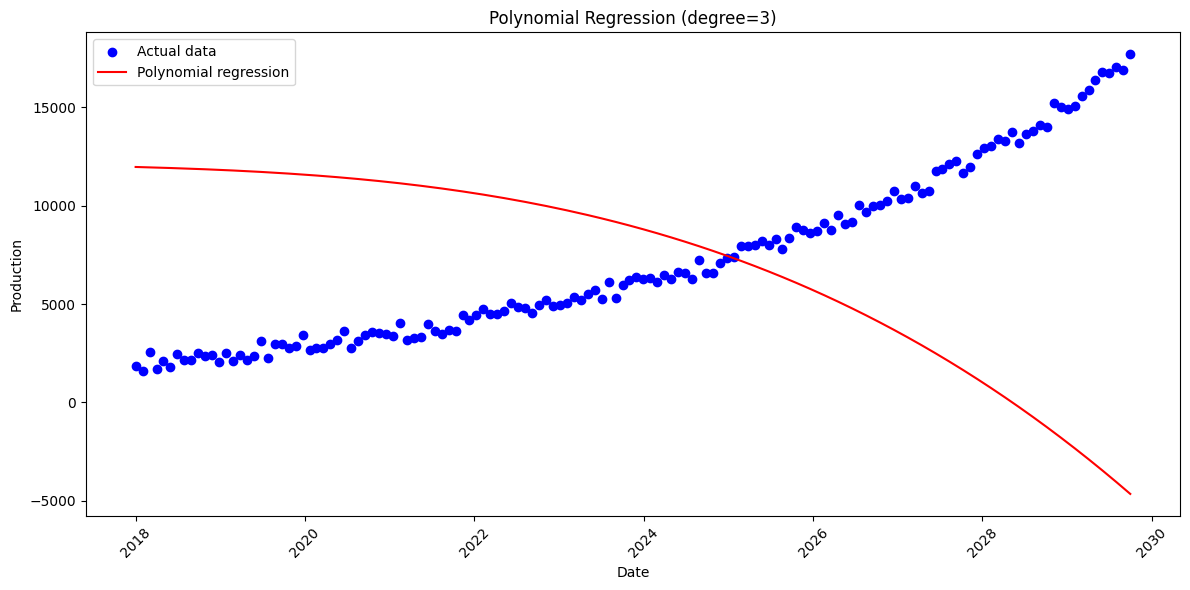

Polynomial equation: y = -0.004x^3 + -0.157x^2 + -9.266x + 11974.825
Polynomial Regression Mean Squared Error: 82807644.353


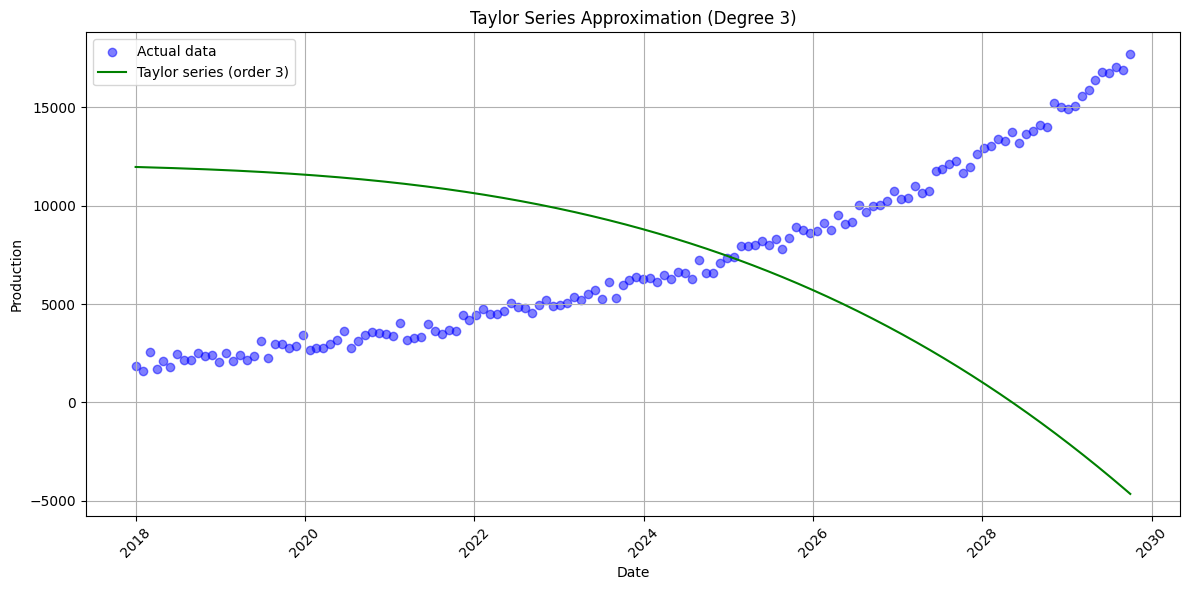

Taylor Series Mean Squared Error: 82807644.353
Taylor series equation: y = 8991.123 + -94.513(x-72) + -1.027(x-72)^2 + -0.004(x-72)^3


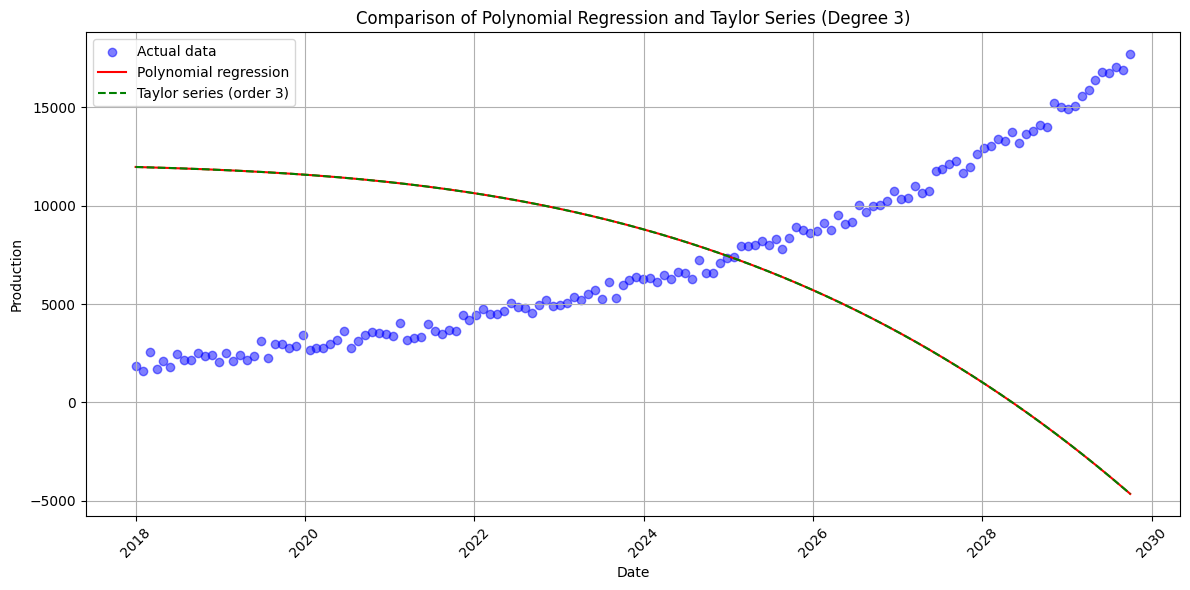

Production will exceed 25,000 bags at approximately January 2005
EGIER needs to start building the new warehouse by January 2004


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Provided data
data = [["M1","M2","M3","M4","M5","M6","M7","M8","M9","M10","M11","M12","M13","M14","M15","M16","M17","M18","M19","M20","M21","M22","M23","M24","M25","M26","M27","M28","M29","M30","M31","M32","M33","M34","M35","M36","M37","M38","M39","M40","M41","M42","M43","M44","M45","M46","M47","M48","M49","M50","M51","M52","M53","M54","M55","M56","M57","M58","M59","M60","M61","M62","M63","M64","M65","M66","M67","M68","M69","M70","M71","M72","M73","M74","M75","M76","M77","M78","M79","M80","M81","M82","M83","M84","M85","M86","M87","M88","M89","M90","M91","M92","M93","M94","M95","M96","M97","M98","M99","M100","M101","M102","M103","M104","M105","M106","M107","M108","M109","M110","M111","M112","M113","M114","M115","M116","M117","M118","M119","M120","M121","M122","M123","M124","M125","M126","M127","M128","M129","M130","M131","M132","M133","M134","M135","M136","M137","M138","M139","M140","M141","M142","M143","M144"],
    
     [1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933, 8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388, 16782, 16716, 17033, 16896, 17689]]

# Convert data to numpy array
y = np.array(data[1])
X = np.arange(1, len(y) + 1)

# Create date range
start_date = datetime(2018, 1, 1)
date_range = [start_date + timedelta(days=30*i) for i in range(len(y))]

# Custom polynomial regression function
def polynomial_regression(X, y, degree):
    X_poly = np.array([X**i for i in range(degree+1)]).T
    coeffs = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return coeffs

# Fit polynomial regression (degree 3)
coeffs = polynomial_regression(X, y, 3)

# Generate predictions
y_pred = sum(coeffs[i] * X**i for i in range(len(coeffs)))

# Plot the data and the polynomial regression model
plt.figure(figsize=(12, 6))
plt.scatter(date_range, y, color='blue', label='Actual data')
plt.plot(date_range, y_pred, color='red', label='Polynomial regression')
plt.title("Polynomial Regression (degree=3)")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the polynomial equation
print(f"Polynomial equation: y = {coeffs[3]:.3f}x^3 + {coeffs[2]:.3f}x^2 + {coeffs[1]:.3f}x + {coeffs[0]:.3f}")

# Calculate MSE for polynomial regression
mse_poly = np.mean((y - y_pred)**2)
print(f"Polynomial Regression Mean Squared Error: {mse_poly:.3f}")

# Newton-Raphson method to find when production exceeds 25,000 bags
def newton_raphson(f, f_prime, x0, epsilon=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        if abs(fx) < epsilon:
            return x
        x = x - fx / f_prime(x)
    return x  # Return the last value if max_iter is reached

def f(x):
    return sum(coeffs[i] * x**i for i in range(len(coeffs))) - 25000

def f_prime(x):
    return coeffs[1] + 2*coeffs[2]*x + 3*coeffs[3]*x**2

# Taylor series approximation
def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n-1)

def taylor_series(f, x0, n, x):
    approximation = 0
    for i in range(n+1):
        approximation += (f(x0, i) * (x - x0)**i) / factorial(i)
    return approximation

# Define the function and its derivatives for Taylor series
def f_taylor(x, n):
    if n == 0:
        return sum(coeffs[i] * x**i for i in range(len(coeffs)))
    elif n == 1:
        return coeffs[1] + 2*coeffs[2]*x + 3*coeffs[3]*x**2    
    elif n == 2:
        return 2*coeffs[2] + 6*coeffs[3]*x
    elif n == 3:
        return 6*coeffs[3]
    else:
        return 0

# Generate points for plotting
x_plot = np.linspace(1, len(y), 1000)
date_plot = [start_date + timedelta(days=30*(x-1)) for x in x_plot]

# Compute polynomial and Taylor series approximations
y_poly = sum(coeffs[i] * x_plot**i for i in range(len(coeffs)))
x0 = len(y) // 2  # Expand around the middle point
y_taylor = [taylor_series(f_taylor, x0, 3, xi) for xi in x_plot]

# Plot the Taylor series separately
plt.figure(figsize=(12, 6))
plt.scatter(date_range, y, color='blue', alpha=0.5, label='Actual data')
plt.plot(date_plot, y_taylor, 'g-', label='Taylor series (order 3)')
plt.title('Taylor Series Approximation (Degree 3)')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate and print MSE for Taylor series
mse_taylor = np.mean((y - [taylor_series(f_taylor, x0, 3, xi) for xi in X])**2)
print(f"Taylor Series Mean Squared Error: {mse_taylor:.3f}")

# Print Taylor series equation
taylor_eq = f"y = {f_taylor(x0,0):.3f} + {f_taylor(x0,1):.3f}(x-{x0}) + {f_taylor(x0,2)/2:.3f}(x-{x0})^2 + {f_taylor(x0,3)/6:.3f}(x-{x0})^3"
print(f"Taylor series equation: {taylor_eq}")

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.scatter(date_range, y, color='blue', alpha=0.5, label='Actual data')
plt.plot(date_plot, y_poly, 'r-', label='Polynomial regression')
plt.plot(date_plot, y_taylor, 'g--', label='Taylor series (order 3)')
plt.legend()
plt.title('Comparison of Polynomial Regression and Taylor Series (Degree 3)')
plt.xlabel('Date')
plt.ylabel('Production')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find when production exceeds 25,000 bags
exceed_month = newton_raphson(f, f_prime, len(y))
exceed_date = start_date + timedelta(days=30*(exceed_month-1))
print(f"Production will exceed 25,000 bags at approximately {exceed_date.strftime('%B %Y')}")

# Calculate the start time to build a new warehouse
start_build_month = exceed_month - 13
start_build_date = start_date + timedelta(days=30*(start_build_month-1))
print(f"EGIER needs to start building the new warehouse by {start_build_date.strftime('%B %Y')}")